## 해외 축구 경기 데이터 기반 승부 예측 프로그램

### 모듈 import

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

 ### 데이터 불러오기 및 기본값 세팅

In [135]:
df_origin = pd.read_csv("lotte_csv.csv", encoding="EUC_KR")
df = df_origin[df_origin['OP'] == 'SK']

train_year = (df["YEAR"] <= 2018)
test_year = (df["YEAR"] >= 2019)
interval = 5

In [136]:
df.head(5)

,YEAR,MONTH,DATE,DAY,WDL,R,ER,OP
2,2008,4,1,화,승,8,4,SK
3,2008,4,2,수,승,6,2,SK
4,2008,4,3,목,패,0,5,SK
17,2008,4,23,수,패,2,5,SK
18,2008,4,24,목,패,1,2,SK


In [137]:
def make_data(data):
    x_r = []
    y_r = []
    x_er = []
    y_er = []

    r = list(data["R"])
    er = list(data["ER"])
#     print(np.array(r).shape)
#     print(np.array(er).shape)
    for i in range(len(r)):
        print(data.iloc[i, 0],data.iloc[i-1, 0])
        if i < interval : continue
        elif data.iloc[i, 0] != data.iloc[i-1, 0] :             
            continue
        y_r.append(r[i])
        y_er.append(er[i])

        xa = []
        xb = []
        for p in range(interval):
            d = i + p - interval
            xa.append(r[d])
            xb.append(er[d])
        x_r.append(xa)
        x_er.append(xb)
    return (x_r, y_r, x_er, y_er)
train_x_r , train_y_r, train_x_er, train_y_er = make_data(df[train_year])
test_x_r, test_y_r, test_x_er, test_y_er = make_data(df[test_year])

2008 2018
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2008 2008
2009 2008
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2009 2009
2010 2009
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2010 2010
2011 2010
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2011 2011
2012 2011
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2012 2012
2013 2012
2013 2013
2013 2013
2013 2013
2013 2013
2013 2013


In [138]:
print(np.array(train_x_r).shape)
print(np.array(train_y_r).shape)
print(np.array(train_x_er).shape)
print(np.array(train_y_er).shape)

print("="*10)

print(np.array(test_x_r).shape)
print(np.array(test_y_r).shape)
print(np.array(test_x_er).shape)
print(np.array(test_y_er).shape)

(175, 5)
(175,)
(175, 5)
(175,)
(11, 5)
(11,)
(11, 5)
(11,)


In [139]:
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()
model1.fit(train_x_r, train_y_r)
model2.fit(train_x_er, train_y_er)

pre_y_r = model1.predict(test_x_r)
pre_y_er = model2.predict(test_x_er)

diff_y_r = abs(pre_y_r-test_y_r)
diff_y_er = abs(pre_y_er-test_y_er)
a = [x for x in diff_y_r if x <= 2]
b = [x for x in diff_y_er if x <= 2]
print("average_r =", sum(diff_y_r)/len(diff_y_r), "max_r =", max(diff_y_r), "score =", len(a)/len(diff_y_r)*100)
print("average_er =", sum(diff_y_er)/len(diff_y_er), "max_er =", max(diff_y_er), "score =", len(b)/len(diff_y_er)*100)

wdl = []
for i in range(len(pre_y_r)):
    if abs(pre_y_r[i]-pre_y_er[i]) == 0 :
        wdl.append("무")
    elif pre_y_r[i] > pre_y_er[i] :
        wdl.append("승")
    else :
        wdl.append("패")

data = df[test_year]
test_wdl = list(data["WDL"])
y = 0
for i in range(len(wdl)):
    if wdl[i] == test_wdl[i]:
        y += 1

print("승패 정확도 :", y/len(wdl)*100)

average_r = 4.2727272727272725 max_r = 10 score = 27.27272727272727
average_er = 2.727272727272727 max_er = 6 score = 36.36363636363637
승패 정확도 : 36.36363636363637


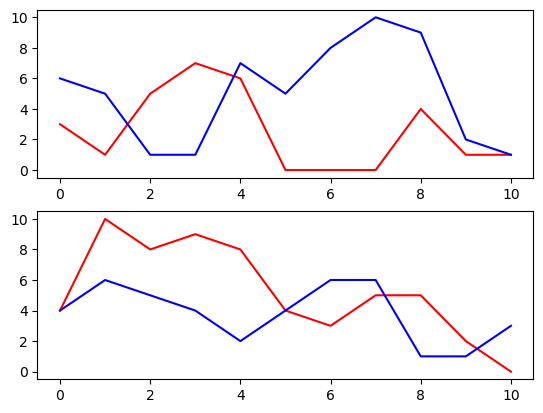

In [140]:
plt.subplot(2, 1, 1)
plt.plot(test_y_r, c='r')
plt.plot(pre_y_r, c='b')

plt.subplot(2,1,2)
plt.plot(test_y_er, c='r')
plt.plot(pre_y_er, c='b')
plt.show()

## MY

---

In [5]:
df_origin = pd.read_csv("data.csv", encoding="cp949")
df = df_origin[df_origin['홈'] == '맨시티']

train_year = (df["시간"] <= "2023-03-08")
test_year = (df["시간"] > "2023-03-11")

interval = 0

In [6]:
df_origin.head(5)

,시간,홈,득점,실점,슈팅,유효슈팅,볼점유율,코너킥,프리킥,오프사이드,...,슈팅.1,유효슈팅.1,볼점유율.1,코너킥.1,프리킥.1,오프사이드.1,파울.1,경고.1,퇴장.1,WDL
0,2021-08-14,토트넘,1,0,12,7,57%,10,15,2,...,5,2,43%,3,10,1,14,3,0,승
1,2021-08-14,브랜트포드,2,0,8,3,35%,2,5,1,...,17,5,65%,5,13,1,8,0,0,승
2,2021-08-14,맨유,5,1,15,9,49%,5,12,5,...,8,3,51%,4,13,3,9,2,0,승
3,2021-08-14,번리,1,2,9,6,45%,7,6,1,...,8,6,55%,6,8,0,6,1,0,패
4,2021-08-14,첼시,3,0,11,6,67%,5,12,0,...,3,1,33%,2,15,1,11,0,0,승


In [7]:
df.head(5)

,시간,홈,득점,실점,슈팅,유효슈팅,볼점유율,코너킥,프리킥,오프사이드,...,슈팅.1,유효슈팅.1,볼점유율.1,코너킥.1,프리킥.1,오프사이드.1,파울.1,경고.1,퇴장.1,WDL
15,2021-08-22,맨시티,5,0,11,5,65%,6,10,2,...,1,0,35%,1,15,3,7,0,0,승
21,2021-08-28,맨시티,5,0,14,11,81%,14,10,1,...,1,0,19%,0,6,3,7,2,1,승
42,2021-09-18,맨시티,0,0,5,0,63%,8,12,4,...,2,2,37%,5,9,0,12,2,0,무
70,2021-10-16,맨시티,2,0,12,7,72%,6,8,0,...,6,2,28%,2,11,3,5,0,0,승
90,2021-10-30,맨시티,0,2,10,3,70%,7,13,2,...,6,3,30%,1,12,5,8,3,0,패


In [8]:
def my_make_data(data):
    x_r = []
    y_r = []
    x_er = []
    y_er = []

    r = list(data["득점"])
    er = list(data["실점"])
    #print(np.array(r).shape)
    #print(np.array(er).shape)
    
    for i in range(len(r)):
        print(data.iloc[i, 0],data.iloc[i-1, 0])
        if i < interval : continue
        elif data.iloc[i, 0] != data.iloc[i-1, 0] : continue
        y_r.append(r[i])
        y_er.append(er[i])

        xa = []
        xb = []
        for p in range(interval):
            d = i + p - interval
            xa.append(r[d])
            xb.append(er[d])
        x_r.append(xa)
        x_er.append(xb)
    return (x_r, y_r, x_er, y_er)
train_x_r , train_y_r, train_x_er, train_y_er = my_make_data(df[train_year])
test_x_r, test_y_r, test_x_er, test_y_er = my_make_data(df[test_year])

2021-08-22 2022-05-23
2021-08-28 2021-08-22
2021-09-18 2021-08-28
2021-10-16 2021-09-18
2021-10-30 2021-10-16
2021-11-21 2021-10-30
2021-11-28 2021-11-21
2021-12-11 2021-11-28
2021-12-15 2021-12-11
2021-12-27 2021-12-15
2022-01-15 2021-12-27
2022-02-10 2022-01-15
2022-02-20 2022-02-10
2022-03-07 2022-02-20
2022-04-11 2022-03-07
2022-04-21 2022-04-11
2022-04-23 2022-04-21
2022-05-09 2022-04-23
2022-05-23 2022-05-09


In [9]:
train_x_r , train_y_r, train_x_er, train_y_er = my_make_data(df[train_year])
test_x_r, test_y_r, test_x_er, test_y_er = my_make_data(df[test_year])

print(np.array(train_x_r).shape)
print(np.array(train_y_r).shape)
print(np.array(train_x_er).shape)
print(np.array(train_y_er).shape)

print("="*10)

print(np.array(test_x_r).shape)
print(np.array(test_y_r).shape)
print(np.array(test_x_er).shape)
print(np.array(test_y_er).shape)

2021-08-22 2022-05-23
2021-08-28 2021-08-22
2021-09-18 2021-08-28
2021-10-16 2021-09-18
2021-10-30 2021-10-16
2021-11-21 2021-10-30
2021-11-28 2021-11-21
2021-12-11 2021-11-28
2021-12-15 2021-12-11
2021-12-27 2021-12-15
2022-01-15 2021-12-27
2022-02-10 2022-01-15
2022-02-20 2022-02-10
2022-03-07 2022-02-20
2022-04-11 2022-03-07
2022-04-21 2022-04-11
2022-04-23 2022-04-21
2022-05-09 2022-04-23
2022-05-23 2022-05-09
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
